In [1]:
!pip install lpproj

     |████████████████████████████████| 221 kB 4.8 MB/s 
  Created wheel for lpproj: filename=lpproj-0.1-py3-none-any.whl size=6594 sha256=29e206c96af587ddadabf03aa8ac70a441a5d3f72ed042210b4ffa057fe0c593
  Stored in directory: /root/.cache/pip/wheels/9e/c7/d6/c39f96d9f2393f32bb33a6cf4021f3dd0453a7d9bcb6629029
Successfully built lpproj


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(1000, n_features=300, centers=4,
                  cluster_std=8, random_state=42)

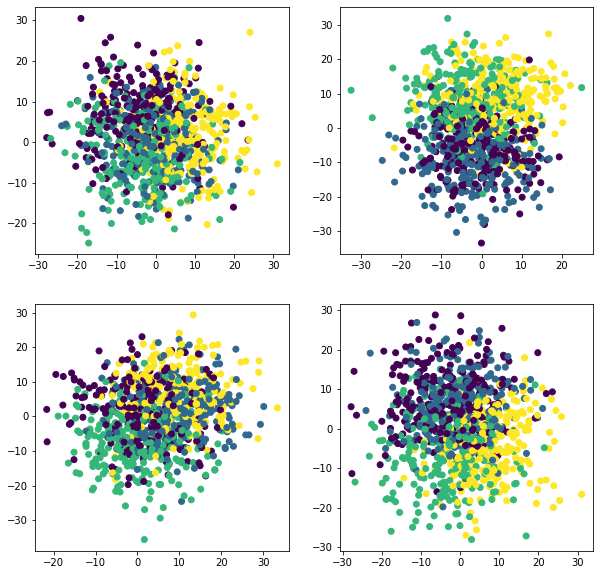

In [4]:
#Random Projections
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
rand = np.random.RandomState(42)

for axi in ax.flat:
    i, j = rand.randint(X.shape[1], size=2)
    axi.scatter(X[:, i], X[:, j], c=y)

In [5]:
#Locality Preserving Projection
from lpproj import LocalityPreservingProjection
lpp = LocalityPreservingProjection(n_components=2)

X_2D = lpp.fit_transform(X)

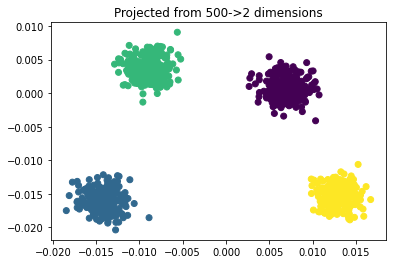

In [6]:
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y)

plt.title("Projected from 500->2 dimensions");

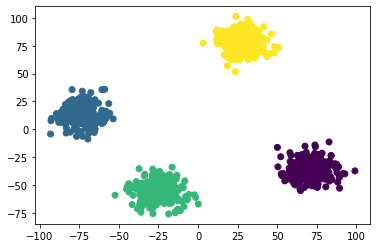

In [7]:
#Comparison with PCA
from sklearn.decomposition import PCA
Xpca = PCA(n_components=2).fit_transform(X)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y);

In [8]:
#Where PCA and LPP Differ
rand = np.random.RandomState(42)
Xnoisy = X.copy()
Xnoisy[:10] += 1000 * rand.randn(10, X.shape[1])

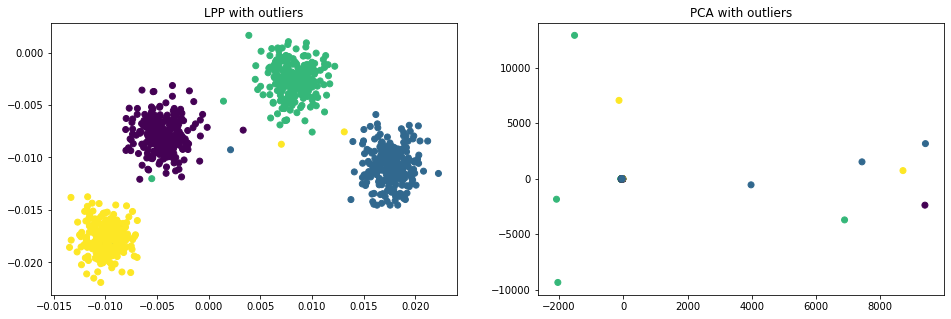

In [9]:
Xpca = PCA(n_components=2).fit_transform(Xnoisy)
Xlpp = LocalityPreservingProjection(n_components=2).fit_transform(Xnoisy)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].scatter(Xlpp[:, 0], Xlpp[:, 1], c=y)
ax[0].set_title('LPP with outliers')
ax[1].scatter(Xpca[:, 0], Xpca[:, 1], c=y)
ax[1].set_title('PCA with outliers');

#In the presence of outliers, the projection found by LPP is much more useful than the projection found by PCA.